# Parking Protect App Analysis
In this notebook, analysis is performed on the parking app data to provide the following meaningful insights:
- Heatmap of location data

First import all modules.

In [1]:
import json
import pandas as pd
import re


Load Json file as a dictionary

In [2]:
file = open('parking-protect-default-rtdb-reports-export.json')
data = json.load(file)

show the data

In [3]:
data

{'-NMYN5P0xD6xQ_78MLfZ': {'address': 'Unnamed Road, Unnamed Road, Dublin',
  'date': 'Tue Jan 24 10:43:43 2023'},
 '-NMYOIgZS8lfqIIdlnxr': {'address': 'Unnamed Road, Unnamed Road, Dublin',
  'date': 'Tue Jan 24 10:49:01 2023'},
 '-NMYOZzYUIAlQ3Bytxh4': {'address': 'Unnamed Road, Unnamed Road, null, Dublin',
  'date': 'Tue Jan 24 10:50:12 2023'},
 '-NM_3JebqsfCA_H8BrU3': {'address': 'Dublin City University, null, Dublin 9',
  'date': '24/01/2023, 18:36:33'},
 '-NMa42BPkJ29jnVQ_0MW': {'address': 'Dublin City University, null, Dublin 9',
  'date': '24/01/2023, 23:19:21',
  'name': 'Diarmuid Brady'},
 '-NMhkIbwDsVBw_gIkUxL': {'address': 'The HUB, Collins Avenue Extension, null',
  'date': 'Thu Jan 26 11:05:41 2023'},
 '-NMoMaSrMt21comJDJgn': {'address': '10, John Street, Sligo',
  'date': 'Fri Jan 27 17:55:05 2023',
  'name': 'Niamh G'},
 '-NN3ygoCzUpXU1BWSW4V': {'address': '43, Earlsfort Avenue, Lucan',
  'date': 'Mon Jan 30 23:19:50 2023',
  'name': 'Niamh G'},
 '-NN6MLVO5XlKOuqsDCmZ': {

Extract the address and data

In [4]:
list_data = [(v['address'], v['date']) for k,v in data.items()]
list_data

[('Unnamed Road, Unnamed Road, Dublin', 'Tue Jan 24 10:43:43 2023'),
 ('Unnamed Road, Unnamed Road, Dublin', 'Tue Jan 24 10:49:01 2023'),
 ('Unnamed Road, Unnamed Road, null, Dublin', 'Tue Jan 24 10:50:12 2023'),
 ('Dublin City University, null, Dublin 9', '24/01/2023, 18:36:33'),
 ('Dublin City University, null, Dublin 9', '24/01/2023, 23:19:21'),
 ('The HUB, Collins Avenue Extension, null', 'Thu Jan 26 11:05:41 2023'),
 ('10, John Street, Sligo', 'Fri Jan 27 17:55:05 2023'),
 ('43, Earlsfort Avenue, Lucan', 'Mon Jan 30 23:19:50 2023'),
 ('Unnamed Road, Unnamed Road, Dublin', 'Tue Jan 31 10:26:47 2023'),
 ('Unnamed Road, Unnamed Road, Dublin', 'Tue Jan 31 10:26:59 2023'),
 ('Unnamed Road, Unnamed Road, Dublin', 'Tue Jan 31 10:27:46 2023'),
 ({'coords': {'accuracy': 20,
    'altitude': 121.5,
    'altitudeAccuracy': 1,
    'heading': 0,
    'latitude': 53.3444755,
    'longitude': -6.4157422,
    'speed': 0},
   'mocked': False,
   'timestamp': 1675294882790},
  'Wed Feb  1 23:41:30 20

Based on a brief look at the data, we need to do two steps

- We can convert address data into coordinates using some existing libraries
- Then merge all into a dataframe and use this for generating the heatmap

In [5]:
def addr_to_coords(s):
    try:
        addr = s.strip().replace('Unnamed Road, ', '').replace('null, ', '')
        locator = Nominatim(user_agent='myGeocoder')
        location = locator.geocode(addr)
        return location[-1][0], location[-1][1]
    except:
        return 0,0

In [6]:
def process(o):
    
    if type(o) == str:
        if o[2] == '.':
            lat, long = o.split(',')
            return float(lat), float(long.split()[0])
        else:
            lat, long = addr_to_coords(o)
            return lat, long
    else:
        lat, long = o['coords']['latitude'], o['coords']['longitude']
        return lat, long

In [7]:
from geopy.geocoders import Nominatim

In [8]:
list_coords = [process(t[0]) for t in list_data]
list_coords

[(53.3498006, -6.2602964),
 (53.3498006, -6.2602964),
 (53.3498006, -6.2602964),
 (53.386489499999996, -6.25926073106762),
 (53.386489499999996, -6.25926073106762),
 (0, 0),
 (54.2705083, -8.4750389),
 (53.3435215, -6.4157529),
 (53.3498006, -6.2602964),
 (53.3498006, -6.2602964),
 (53.3498006, -6.2602964),
 (53.3444755, -6.4157422),
 (53.3444864, -6.4157017),
 (53.3444776, -6.4156934),
 (53.3444669, -6.4157726),
 (53.3444669, -6.4157726),
 (53.3444832, -6.4157229),
 (38.7467633, -9.1551439),
 (54.3233541, -8.4949267),
 (54.2704742, -8.4745826),
 (53.38351585779761, -6.257647216588858),
 (53.3855896, -6.2572469),
 (53.3855896, -6.2572469),
 (53.3870005, -6.2583183),
 (53.3857893, -6.2564184),
 (53.38489267740439, -6.258683122134949),
 (53.38489267740439, -6.258683122134949),
 (53.38489267740439, -6.258683122134949),
 (53.38489267740439, -6.258683122134949),
 (53.38489267740439, -6.258683122134949),
 (53.38489267740439, -6.258683122134949),
 (53.38489267740439, -6.258683122134949),
 (53

Let's get own date data

In [9]:
list_dates = [pd.to_datetime(t[1]) for t in list_data]

/tmp/ipykernel_827/112639683.py:1: UserWarning: Parsing dates in %d/%m/%Y, %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  list_dates = [pd.to_datetime(t[1]) for t in list_data]


now create a dataframe with the data

In [10]:
df = pd.DataFrame()
df[['Latitude', 'Longitude']] = list_coords
df['Datetime'] = list_dates

Creating all necessary columns based on Datetime

In [11]:
df['Date'] = df.Datetime.dt.date
df['Day'] = pd.Categorical(
    df.Datetime.dt.day_name(), 
    categories=['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True
    )
df['Time'] = df.Datetime.dt.time
df['Time_num'] = df.Time.apply(lambda x: x.hour + x.minute / 60)
df['Hour'] = df.Time.apply(lambda x: x.hour)

In [12]:
df

,Latitude,Longitude,Datetime,Date,Day,Time,Time_num,Hour
0,53.349801,-6.260296,2023-01-24 10:43:43,2023-01-24,Tuesday,10:43:43,10.716667,10
1,53.349801,-6.260296,2023-01-24 10:49:01,2023-01-24,Tuesday,10:49:01,10.816667,10
2,53.349801,-6.260296,2023-01-24 10:50:12,2023-01-24,Tuesday,10:50:12,10.833333,10
3,53.386489,-6.259261,2023-01-24 18:36:33,2023-01-24,Tuesday,18:36:33,18.600000,18
4,53.386489,-6.259261,2023-01-24 23:19:21,2023-01-24,Tuesday,23:19:21,23.316667,23
...,...,...,...,...,...,...,...,...
58,53.343522,-6.415753,2023-04-23 23:54:58,2023-04-23,Sunday,23:54:58,23.900000,23
59,53.343522,-6.415753,2023-04-23 23:56:49,2023-04-23,Sunday,23:56:49,23.933333,23
60,53.343522,-6.415753,2023-04-24 00:00:47,2023-04-24,Monday,00:00:47,0.000000,0
61,53.352552,-6.390253,2023-05-02 17:06:50,2023-05-02,Tuesday,17:06:50,17.100000,17


Here are some visualisations of dates

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt;
%matplotlib inline

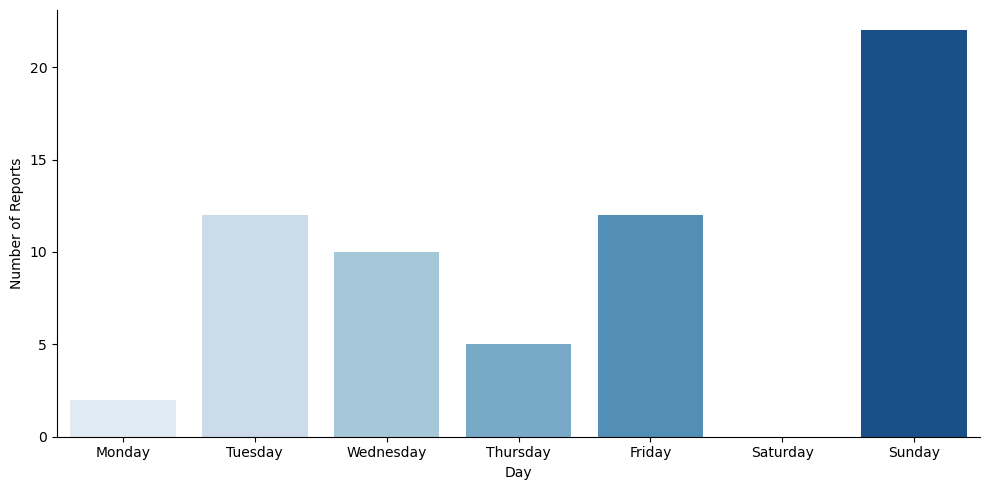

In [14]:
sns.catplot(data=df, x='Day', kind='count', palette='Blues', aspect=2)
plt.ylabel('Number of Reports');

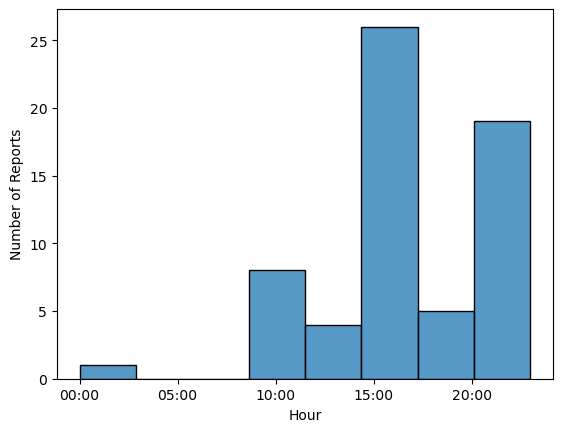

In [15]:
ax = sns.histplot(data=df, x='Hour')
ax.set_xticks([0,5,10,15,20])
ax.set_xticklabels(['00:00', '05:00', '10:00', '15:00' ,'20:00']);
plt.ylabel('Number of Reports');

Let's plot the coordinates on a map

In [16]:
import folium
#we are passing Into Map location coodinates of Tughlakabad,new delhi which we found in avove codes.
#using geopy library
map=folium.Map()
for i in list_coords:
    map.add_child(folium.Marker(location=[i[0],i[1]],
                                popup=i[0],icon=folium.Icon(color='green')))

In [17]:
map

In [22]:
import pandas as pd
import plotly.express as px

fig = px.density_mapbox(df, lat = 'Latitude', lon = 'Longitude', z = [1] * len(df),
                        radius = 12,
                        center = dict(lat = 53.360852, lon = -6.301335), 
                        zoom = 10.5,
                        mapbox_style = 'open-street-map')
fig.show()